DSC 530 Final Project Code
Winters, Dean

In [181]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot
import os
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [56]:
os.getcwd()

fname = os.path.join("Video_Games_Sales_as_at_22_Dec_2016.csv")
game_df = pd.read_csv(fname)

0    Action
dtype: object

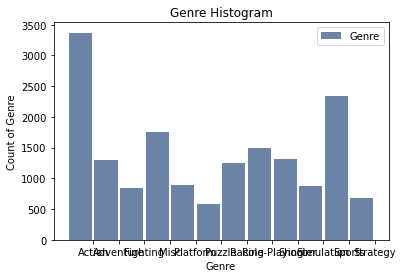

In [120]:
# Histograms
genre_hist = thinkstats2.Hist(game_df.Genre, label='Genre')
thinkplot.Hist(genre_hist)
thinkplot.Config(title='Genre Histogram', xlabel='Genre', ylabel='Count of Genre')

game_df.Genre.mode()

34.562579486269144

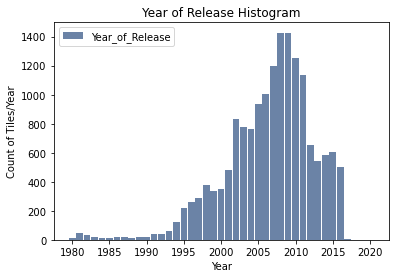

In [129]:
year_hist = thinkstats2.Hist(game_df.Year_of_Release, label='Year_of_Release')
thinkplot.Hist(year_hist)
thinkplot.Config(title='Year of Release Histogram', xlabel='Year', ylabel='Count of Tiles/Year')

game_df.Year_of_Release.mean()
game_df.Year_of_Release.mode()
game_df.Year_of_Release.var()

0    Electronic Arts
dtype: object

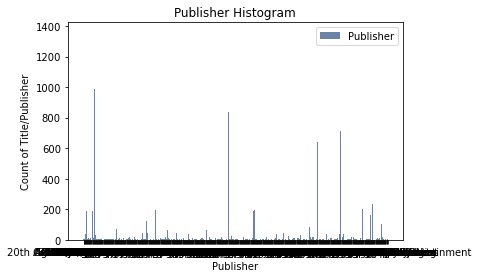

In [124]:
publisher_hist = thinkstats2.Hist(game_df.Publisher, label='Publisher')
thinkplot.Hist(publisher_hist)
thinkplot.Config(title='Publisher Histogram', xlabel='Publisher', ylabel='Count of Title/Publisher')

game_df.Publisher.mode()

2.396103150334869

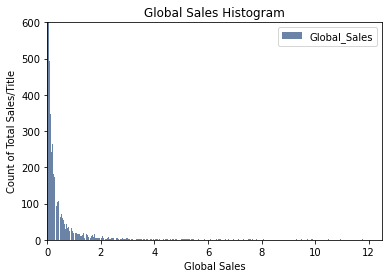

In [128]:
sales_hist = thinkstats2.Hist(game_df.Global_Sales, label='Global_Sales')
thinkplot.Hist(sales_hist)
thinkplot.Config(title='Global Sales Histogram', xlabel='Global Sales', ylabel='Count of Total Sales/Title', xlim=[0, 12.5], ylim=[0, 600])

game_df.Global_Sales.mean()
game_df.Global_Sales.mode()
game_df.Global_Sales.var()

0    PS2
dtype: object

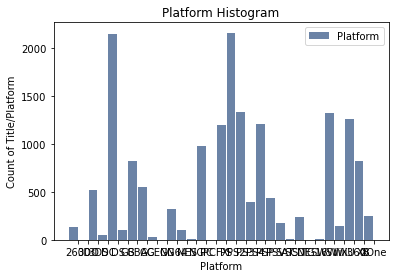

In [125]:
platform_hist = thinkstats2.Hist(game_df.Platform, label='Platform')
thinkplot.Hist(platform_hist)
thinkplot.Config(title='Platform Histogram', xlabel='Platform', ylabel='Count of Title/Platform')

game_df.Platform.mode()

In [133]:
# PMFs
NA_sales_pmf = thinkstats2.Pmf(game_df.NA_Sales, label = 'NA Sales')
EU_sales_pmf = thinkstats2.Pmf(game_df.EU_Sales, label = 'EU Sales')

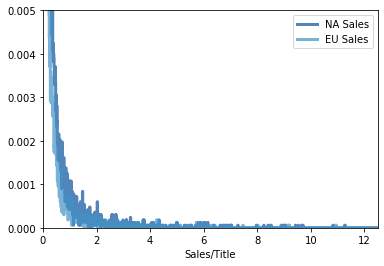

In [142]:
axis = [0, 12.5, 0, 0.005]
thinkplot.PrePlot(2)
thinkplot.Pmfs([NA_sales_pmf, EU_sales_pmf])
thinkplot.Config(xlabel='Sales/Title', axis=axis)

In [143]:
JP_sales_pmf = thinkstats2.Pmf(game_df.JP_Sales, label = 'JP Sales')

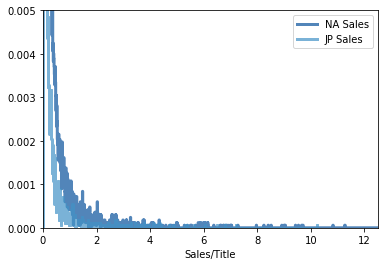

In [144]:
axis = [0, 12.5, 0, 0.005]
thinkplot.PrePlot(2)
thinkplot.Pmfs([NA_sales_pmf, JP_sales_pmf])
thinkplot.Config(xlabel='Sales/Title', axis=axis)

In [149]:
# CDF
NA_sales_cdf = thinkstats2.Cdf(game_df.NA_Sales, label = 'NA Sales')
EU_sales_cdf = thinkstats2.Cdf(game_df.EU_Sales, label = 'EU Sales')

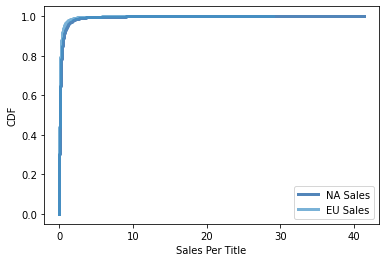

<Figure size 576x432 with 0 Axes>

In [150]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([NA_sales_cdf, EU_sales_cdf])
thinkplot.Show(xlabel = 'Sales Per Title', ylabel = 'CDF')

In [156]:
# Analytical Distributions
def MakeNormalModel(sales):
    """Plots a CDF with a Normal model.

    sales: sequence
    """
    cdf = thinkstats2.Cdf(sales, label='Sales')

    mean, var = thinkstats2.TrimmedMeanVar(sales)
    std = np.sqrt(var)
    print('n, mean, std', len(sales), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std 16719 -0.766836791556557 0.6045603400745002


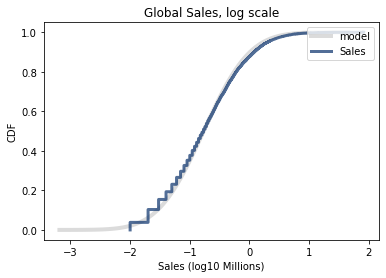

In [157]:
log_sales = np.log10(game_df.Global_Sales)
MakeNormalModel(log_sales)
thinkplot.Config(title='Global Sales, log scale', xlabel='Sales (log10 Millions)',
                 ylabel='CDF', loc='upper right')

In [158]:
def MakeNormalPlot(sales):
    """Generates a normal probability plot of birth weights.

    sales: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(sales, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(sales)
    thinkplot.Plot(xs, ys, label='Sales')

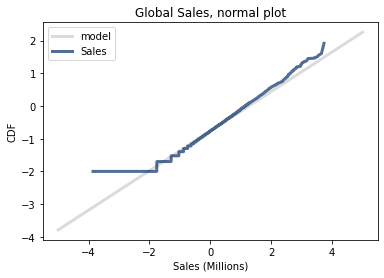

In [159]:
MakeNormalPlot(log_sales)
thinkplot.Config(title='Global Sales, normal plot', xlabel='Sales (Millions)',
                 ylabel='CDF', loc='upper left')

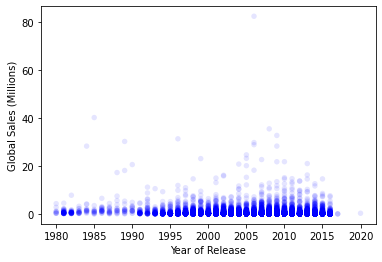

In [163]:
# Scatterplots
year, sales = game_df.Year_of_Release, game_df.Global_Sales

thinkplot.Scatter(year, sales, alpha=0.1)
thinkplot.Config(xlabel='Year of Release', ylabel='Global Sales (Millions)')

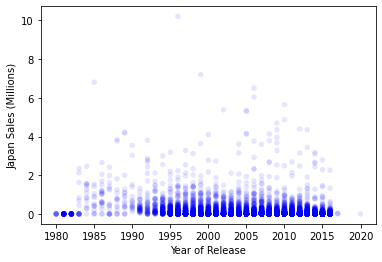

In [170]:
year, jp_sales = game_df.Year_of_Release, game_df.JP_Sales

thinkplot.Scatter(year, jp_sales, alpha=0.1)
thinkplot.Config(xlabel='Year of Release', ylabel='Japan Sales (Millions)')

In [178]:
#Hypothesis Test
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
class DiffStdPermute(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat
    
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat

In [179]:
data = game_df.NA_Sales, game_df.EU_Sales
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

0.0

In [180]:
# Regression Analysis
def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [184]:
formula = 'Global_Sales ~ Genre'
model = smf.ols(formula, data=game_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     18.75
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           6.77e-38
Time:                        00:10:51   Log-Likelihood:                -30922.
No. Observations:               16717   AIC:                         6.187e+04
Df Residuals:                   16705   BIC:                         6.196e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.5179      0.027     19.535      0.000       0.466       0.570
Genre[T.Adventure]       -0.3355      0.050     -6.682      0.000      -0.434      -0.237
Genre[T.Fighting]         0.0092      0.059      0.155      0.877      -0.107       0.125
Genre[T.Misc]            -0.0589      0.045     -1.299      0.194      -0.148       0.030
Genre[T.Platform]         0.4146      0.058      7.143      0.000       0.301       0.528
Genre[T.Puzzle]          -0.0989      0.069     -1.429      0.153      -0.234       0.037
Genre[T.Racing]           0.0657      0.051      1.289      0.198      -0.034       0.166
Genre[T.Role-Playing]     0.1050      0.048      2.199      0.028       0.011       0.199
Genre[T.Shooter]          0.2780      0.050      5.567      0.000       0.180       0.376
Genre[T.Simulation]      -0.0712      0.058     -1.218      0.223      -0.186       0.043
Genre[T.Sports]           0.0494      0.041      1.194      0.232      -0.032       0.130
Genre[T.Strategy]        -0.2624      0.065     -4.063      0.000      -0.389      -0.136
==============================================================================
Omnibus:                    34794.532   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        264551685.720
Skew:                          17.520   Prob(JB):                         0.00
Kurtosis:                     618.288   Cond. No.                         8.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""